# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****


</div>

In [3]:
import pandas as pd
import seaborn as sns
import math
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

# Question 1

The distribution of the dataset appears to be normal.  The mean, median and mode are all the same for both temperature and heart_rate.  The curves appear normally distributed with thin tails at either end and a large hump in the middle.  Finally, the pair plot shows that the curves are not only normally distributed but the scatterplots are also distributed with sufficient randomness.

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.mean()

temperature    98.249231
heart_rate     73.761538
dtype: float64

In [6]:
df.median()

temperature    98.3
heart_rate     74.0
dtype: float64

In [7]:
df.temperature.mode()

0    98.0
dtype: float64

In [8]:
df.heart_rate.mode()

0    73.0
1    78.0
dtype: float64

In [9]:
temp = df['temperature']

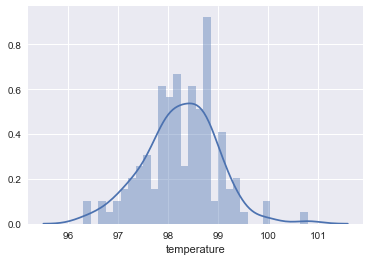

In [10]:
sns.distplot(temp,bins=30)

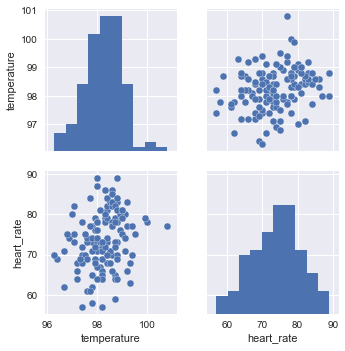

In [11]:
sns.pairplot(df)

# Question 2

Is the sample size large enough:

In [12]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


The sample size is 130.  This is large enough to meet the requirements of the CLT.  Usually a sample size n > 30 is sufficient for the central limit theorem to hold.

The width of a 95% CI:

In [13]:
w=2*1.96*0.733/math.sqrt(130)
w

0.25201034303560454

Are the observations independent:

It is possible that the variables are not independent due to normal fluctuations in the body. Body temperature and heart rate can affect one another. A number of factors could be explored such as:

 - ambient temperature
 - exercise
 - blood pressure
 - menstrual cycle
 - blood content of stimulants
 

# Question 3

Is the true population mean 98.6 F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  t  or  z  statistic?
- Now try using the other test. How is the result be different? Why?

The one-sample test is best used to challenge the mean of the sample against a population where the mean is known.  In this case we would take the hypothesis that the population mean is 98.6F as suggested.  We would test it against a statistic and reject the hypothesis based on the answer.

The statistic we will use is the t statistic because although we have a reasonably large sample size we do not know the population standard deviation.  The t statistic is best for smaller sample sizes or when the population standard deviation isn't known.

The rejection region will be set based on a two tailed test that supposes the mean is not equal to 98.6F.  The critical value of alpha will be assumed as 0.05.  Because we are doing a two tailed test the tail area will correspond to an alpha/2 of 0.025.

The critical value will therefore be +/- 1.96 according to the tables.

- Ho: The mean human body temperature is 98.6F
- Ha: The mean human body temperature is not equal to 98.6F

In [14]:
sample_std = 0.733

In [20]:
t=(98.249-98.6)/(sample_std/math.sqrt(130))
t

-5.45977591009272

The observed sample mean is more than 5 standard deviations above what would have been expected were the null hypothesis true.

We shall reject the null hypothesis - that the 98.6F body temperature is accurate - if the statistic value does not fall within the two tail rejection region where alpha = 0.05 the range would be -1.96<t<1.96 does not include the value of the statistic

The null hypothesis is rejected and the mean is considered to not be equal to 98.6



A two tailed z test would have critical values of +/- alpha/2 being +/- 1.67

the value of the statistic would be

z = (sample mean - population mean) / sample_std

In [21]:
z = (98.249-98.6)/(sample_std)
z

-0.4788540245566154

the value of the test statistic does fall within the region of +/- 1.69 for a two tailed t test with alpha = 0.05

Note that we have assumed the sample std to be representative of the population and the null hypothesis would have been true.

# Question 4
At what temperature should we consider someone's temperature to be "abnormal"?

Computing the confidence interval:

The 95% confidence level was used for the hypothesis tests.

The actual sample observations are assumed to be the result of a random sample from a normal distribution with mean value and standard deviation.

A concise expression for the confidence interval is:
mean +/- 1.96*stdDev/sqrt(n)

In [23]:
CI_upperbound = 98.249 + 1.96*sample_std/math.sqrt(130)
CI_lowerbound = 98.249 - 1.96*sample_std/math.sqrt(130)

In [25]:
CI = (CI_lowerbound,CI_upperbound)
CI

(98.12299482848219, 98.3750051715178)

We would expect a body temperature outside this interval to be considered abnormal.  The null hypothesis of 98.6F is therefore considered abnormal

Now to calculate the margin of error:

As this is a sample we will make use of the std_dev/sqrt(n) for calculating the SE of the mean

In [27]:
MoE = 1.96*sample_std/math.sqrt(130)
MoE

0.12600517151780227

# Question 5

Is there a difference between male and female normal temperature?

We will use a two sample z test to test the difference in means for significance

Assume:

the samples are sufficiently large such that CLT guarantees normal distribution. Usually ok for samples >40

Test Statistic:
Z = (Xbar -Ybar -(mu1-mu2))/(sqrt(std1^2/m + std2^2/n)

    - Ho: mu1 = mu2
    - Ha: mu1 - mu2 >0

- Let 1 denote Female and 2 denote Male
- Let m denote Female sample size and n denote Male sample size
- Let X denote Female and Y denote Male means

Critical Value will be based on a 99% confidence level, therefore alpha = 0.01 as we are doint a single tail test

Critical Value = 2.33

In [32]:
gender_df=df.groupby(['gender']).mean()
gender_df

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [39]:
male_df = df[df['gender']=='M']
female_df = df[df['gender']=='F']

In [40]:
male_df.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [41]:
female_df.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [44]:
Z = (98.394-98.105)/math.sqrt(0.743**2/65+0.6988**2/65)
Z

2.284338813736011

Ho will be rejected if Z>= 2.33 and it is not so we are confident that the Female mean temperature is not higher than Male for the population

Story:

Although the mean body temperature of the Males and Females in the data differed slightly the population mean is not likely to be significantly different.

There are many factors that may have influenced the results in the sample.